In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
# grafica dentro del cuardernillo
%matplotlib inline

In [2]:
import pandas as pd
# es para cambiar los datos categorizados a numericos
from sklearn.preprocessing import LabelEncoder
#from datetime import datetime

In [3]:
#Carga de dataset
data = pd.read_csv('/content/ford.csv')

In [4]:
print(data)

         model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17961    B-MAX  2017   8999       Manual    16700   Petrol  150  47.1   
17962    B-MAX  2014   7499       Manual    40700   Petrol   30  57.7   
17963    Focus  2015   9999       Manual     7010   Diesel   20  67.3   
17964       KA  2018   8299       Manual     5007   Petrol  145  57.7   
17965    Focus  2015   8299       Manual     5007   Petrol   22  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3             1.5  
4             1.0  
...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [7]:
print(columnas_categoricas)

Index(['model', 'transmission', 'fuelType'], dtype='object')


In [8]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  #hacemos una nueva instancia
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [9]:
print(data)

       model  year  price  transmission  mileage  fuelType  tax   mpg  \
0          5  2017  12000             0    15944         4  150  57.7   
1          6  2018  14000             1     9083         4  150  57.7   
2          6  2017  13000             1    12456         4  150  57.7   
3          5  2019  17500             1    10460         4  145  40.3   
4          5  2019  16500             0     1482         4  145  48.7   
...      ...   ...    ...           ...      ...       ...  ...   ...   
17961      0  2017   8999             1    16700         4  150  47.1   
17962      0  2014   7499             1    40700         4   30  57.7   
17963      6  2015   9999             1     7010         0   20  67.3   
17964     11  2018   8299             1     5007         4  145  57.7   
17965     23  2015   8299             1     5007         4   22  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3             1.5  
4             1.0  
...

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  int64  
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  int64  
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  int64  
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 1.2 MB


In [11]:
# Lectura de Datos
columnas_seleccionadas = list(range(0, 2)) + list(range(3, 9))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 2]
m = y.size

In [12]:
print(X)
print('*'*25)
print(y)
print('*'*25)
print(m)

       model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0          5  2017             0    15944         4  150  57.7         1.0
1          6  2018             1     9083         4  150  57.7         1.0
2          6  2017             1    12456         4  150  57.7         1.0
3          5  2019             1    10460         4  145  40.3         1.5
4          5  2019             0     1482         4  145  48.7         1.0
...      ...   ...           ...      ...       ...  ...   ...         ...
17961      0  2017             1    16700         4  150  47.1         1.4
17962      0  2014             1    40700         4   30  57.7         1.0
17963      6  2015             1     7010         0   20  67.3         1.6
17964     11  2018             1     5007         4  145  57.7         1.2
17965     23  2015             1     5007         4   22  57.7         1.0

[17966 rows x 8 columns]
*************************
0        12000
1        14000
2        13000
3  

In [13]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [14]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0          5  2017             0    15944         4  150  57.7         1.0
1          6  2018             1     9083         4  150  57.7         1.0
2          6  2017             1    12456         4  150  57.7         1.0
3          5  2019             1    10460         4  145  40.3         1.5
4          5  2019             0     1482         4  145  48.7         1.0
...      ...   ...           ...      ...       ...  ...   ...         ...
17961      0  2017             1    16700         4  150  47.1         1.4
17962      0  2014             1    40700         4   30  57.7         1.0
17963      6  2015             1     7010         0   20  67.3         1.6
17964     11  2018             1     5007         4  145  57.7         1.2
17965     23  2015             1     5007         4   22  57.7         1.0

[17966 rows x 8 columns]
Media calculada: model               6.848547
year             2016.866470

In [15]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [16]:
print(X)

[[ 1.         -0.46069913  0.06512772 ...  0.59135805 -0.02044162
  -0.81138621]
 [ 1.         -0.21147687  0.55286624 ...  0.59135805 -0.02044162
  -0.81138621]
 [ 1.         -0.21147687  0.06512772 ...  0.59135805 -0.02044162
  -0.81138621]
 ...
 [ 1.         -0.21147687 -0.91034931 ... -1.50505332  0.92766777
   0.57636151]
 [ 1.          1.03463446  0.55286624 ...  0.51072684 -0.02044162
  -0.34880364]
 [ 1.          4.02530164 -0.91034931 ... -1.47280084 -0.02044162
  -0.81138621]]


In [17]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [18]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [19]:
print(X)

[[ 1.         -0.46069913  0.06512772 ...  0.59135805 -0.02044162
  -0.81138621]
 [ 1.         -0.21147687  0.55286624 ...  0.59135805 -0.02044162
  -0.81138621]
 [ 1.         -0.21147687  0.06512772 ...  0.59135805 -0.02044162
  -0.81138621]
 ...
 [ 1.         -0.21147687 -0.91034931 ... -1.50505332  0.92766777
   0.57636151]
 [ 1.          1.03463446  0.55286624 ...  0.51072684 -0.02044162
  -0.34880364]
 [ 1.          4.02530164 -0.91034931 ... -1.47280084 -0.02044162
  -0.81138621]]


theta calculado por el descenso por el gradiente: [12197.00271509   208.46449922  2187.91320105   -92.00443493
 -1364.4948486   -734.49263869   205.24559627 -1037.6962092
  1608.44683847]
El valor predecido es (usando el descenso por el gradiente): 17236.4703


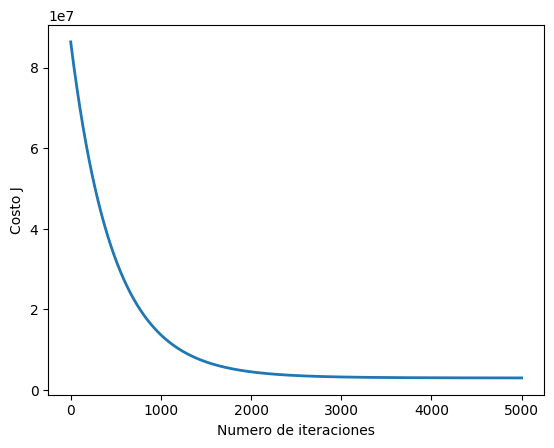

In [21]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un auto Ford en distintas caracteristicas
X_array = [1, 5, 2019, 1, 10460, 4, 145, 40.3, 1.5]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))